
# Puntos óptimos para el cálculo de tensiones y deformaciones en el MEF



Análisis de Estructuras. Grado en Ingeniería Civil. 

Autor: 
- Alejandro E. Martínez-Castro.
- Dpto. Mecánica de Estructuras e Ingeniería Hidráulica. Universidad de Granada.



<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Cuadernos MEF: Viga de Bernoulli-Euler</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Alejandro Martínez Castro, Esther Puertas García, Rafael Gallego Sevilla</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional License</a>.

## Motivación

Este cuaderno es un apoyo a la clase presencial. Utilizaremos las habilidades de Python para mostrar con ejemplos una interesante propiedad de los puntos de una cuadratura de Gauss. 

En el intervalo $x \in [-1,1]$, consideremos un polinomio de grado $N$, y otro de grado $N-1$ obtenido como ajuste por mínimos cuadrados a partir del anterior. 

Puede demostrarse que ambos polinomios se cortan en las abscisas de los puntos de Gauss de una cuadratura de orden $N$. 

En este cuaderno se plantean unos ejemplos. Es interesante que pruebe modificar los coeficientes del polinomio original, para ver que la coincidencia no depende de dichos coeficientes. 

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 2.7.13-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


### Ejemplo 1. Polinomio de grado $N=2$

Consideremos el polinomio

$f(x) = 1 + x + x^2$, 

con $x \in [-1,1]$. 

Este polinomio es de grado $N=2$. Un polinomio de grado $N-1$, genérico, es de la forma: 

$g(x) = a + b x$

Ajusteremos las constantes $a$ y $b$ para que $g(x)$ sea el ajuste por mínimos cuadrados del polinomio $f(x)$ en el intervalo $x\in[-1,1]$. 

En primer lugar, definiremos los símbolos para $a$ y $b$, y definiremos los polinomios para $f$ y $g$

In [2]:
a,b = symbols('a b')

In [3]:
f = 1 + x + x**2
f

In [4]:
g = a + b * x
g

A continuación se va a plantear minimizar la siguiente función: 

$$ M(a,b) = \int_{-1}^{1} [f(x) - g(x) ]^2 \,d\,x$$

Plantearemos por tanto que las derivadas parciales respecto de $a$ y $b$ sean 0, y de ahí podremos obtener los valores de $a$ y $b$ del polinomio de ajuste. 

\begin{align}
\dfrac{\partial M}{\partial a} &= 0 \\
\dfrac{\partial M}{\partial b} &= 0
\end{align}

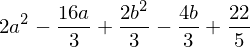

In [5]:
minimizar = integrate((f - g)**2,(x,-1,1))
minimizar

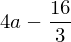

In [6]:
eq1 = diff(minimizar,a)
eq1

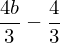

In [7]:
eq2 = diff(minimizar,b)
eq2

Debemos resolver ambas ecuaciones a la vez. Para esto, Sympy dispone de un solver: el resultado está en formato de _diccionario_. 

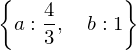

In [8]:
from sympy.solvers import solve
solucion = solve([eq1,eq2],[a,b])
solucion

In [9]:
a_sol = solucion[a]
b_sol = solucion[b]

El polinomio de ajuste, por tanto, es el siguiente:

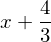

In [10]:
g_ajuste = g.subs([(a,a_sol),(b,b_sol)])
g_ajuste

A continuación se dibujarán ambas funciones, pero no se va a dar salida en este cuaderno, sino en ventana aparte, para poder localizar con el puntero los puntos de corte. 

In [11]:
# Dibujo ambas funciones. Ver en figura aparte y localizar los puntos de corte
from sympy.plotting import plot

plot(f,g_ajuste,(x,-1,1))

A continuación localizaremos los puntos de corte entre ambas curvas

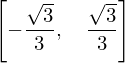

In [12]:
puntos_corte = solve(f-g_ajuste,x)
puntos_corte

Evaluaremos numéricamente estos puntos:

In [13]:
puntos = []
for punto in puntos_corte:
    puntos.append(N(punto))

In [14]:
puntos


Estos puntos de corte coinciden con las abscisas de los puntos de Gauss de una cuadratura de orden 2. 

Veámoslo:

In [15]:
import numpy as np
NPGauss = 2
pgauss = np.polynomial.legendre.leggauss(NPGauss)
        
pgauss[0]

array([-0.57735027,  0.57735027])

### Ejemplo 2. Polinomio de grado $N=3$

Consideremos el polinomio

$f(x) = 1 + x + x^2 + x^3$, con $x \in [-1,1]$. 

Este polinomio es, en esta ocasión, de grado $N=3$. Un polinomio de grado $N-1$, genérico, es de la forma: 

$g(x) = a + b x + c x^2$

Ajusteremos las constantes $a$, $b$, y $c$ para que $g(x)$ sea el ajuste por mínimos cuadrados del polinomio $f(x)$ en el intervalo $x\in[-1,1]$. 

Definiremos los símbolos adicionales y realizaremos operaciones análogas al caso anterior. 

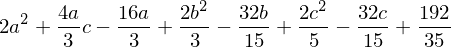

In [16]:
c = symbols('c')
f = 1 + x + x**2 + x**3
g = a + b*x + c*x**2
minimizar = integrate((f - g)**2,(x,-1,1))
minimizar

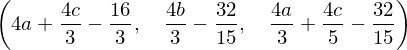

In [17]:
eq1 = diff(minimizar,a)
eq2 = diff(minimizar,b)
eq3 = diff(minimizar,c)
eq1, eq2, eq3

Resolviendo las tres ecuaciones a la vez:

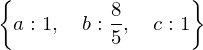

In [18]:
solucion = solve([eq1,eq2,eq3],[a,b,c])
solucion

In [19]:
a_sol = solucion[a]
b_sol = solucion[b]
c_sol = solucion[c]

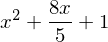

In [20]:
g_ajuste = g.subs([(a,a_sol),(b,b_sol),(c,c_sol)])
g_ajuste

In [21]:
# Dibujo ambas funciones. Ver en figura aparte y localizar los puntos de corte
from sympy.plotting import plot

plot(f,g_ajuste,(x,-1,1))

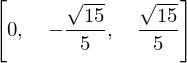

In [22]:
puntos_corte = solve(f-g_ajuste,x)
puntos_corte

In [23]:
puntos = []
for punto in puntos_corte:
    puntos.append(N(punto))

puntos = np.array(puntos)
puntos.sort()
puntos

array([-0.774596669241483, 0, 0.774596669241483], dtype=object)

In [24]:
NPGauss = 3
pgauss = np.polynomial.legendre.leggauss(NPGauss)
        
pgauss[0]

array([-0.77459667,  0.        ,  0.77459667])